In [1]:
from pyxdf import match_streaminfos, resolve_streams
from mnelab.io.xdf import read_raw_xdf
import mne
import mnelab
import os.path
import numpy as np
import scipy

In [2]:
import scipy; print(scipy.__version__)

path ='./pilot/'
# ['TP9', 'AF7', 'AF8', 'TP10']
picks = ['TP9', 'AF7', 'AF8', 'TP10']
numOfPilots = 20
reject_criteria = dict(eeg=100e-6)   
isResultMat = False
numParticipants = 0


1.10.1


In [3]:
mne.set_log_level(verbose='WARNING', return_old_level=False, add_frames=None)

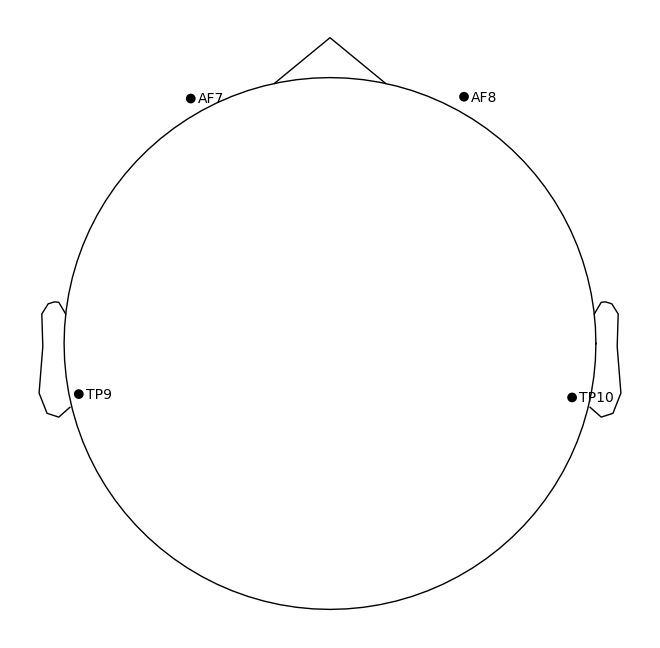

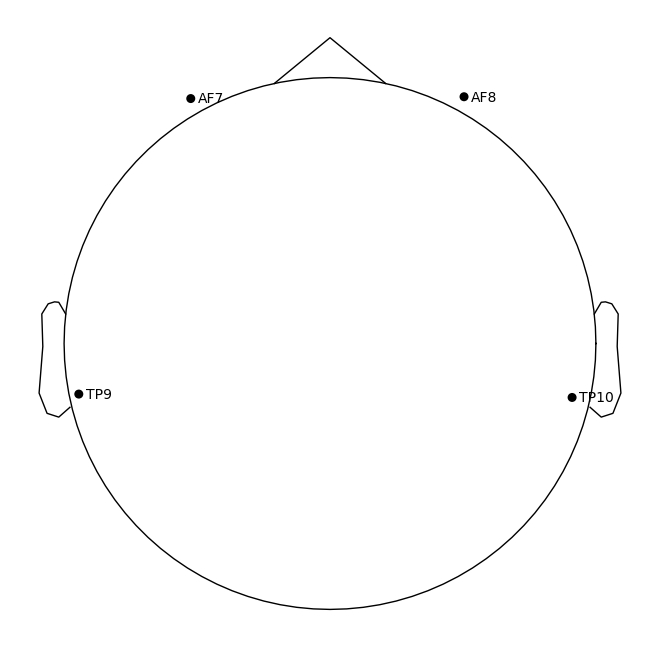

In [4]:
mont1020 = mne.channels.make_standard_montage('standard_1020')
# Choose what channels you want to keep 
# Make sure that these channels exist e.g. T1 does not exist in the standard 10-20 EEG system!
kept_channels = ["TP9", "AF7","AF8","TP10"]
ind = [i for (i, channel) in enumerate(mont1020.ch_names) if channel in kept_channels]
mont1020_new = mont1020.copy()
# Keep only the desired channels
mont1020_new.ch_names = [mont1020.ch_names[x] for x in ind]
kept_channel_info = [mont1020.dig[x+3] for x in ind]
# Keep the first three rows as they are the fiducial points information
mont1020_new.dig = mont1020.dig[0:3]+kept_channel_info
# mont1020.plot()
mont1020_new.plot()

In [5]:
for pnum in range(1,numOfPilots +1):
    paraticipant = "P"+ str(pnum)
    print(pnum)

    path ='./'+ paraticipant +'/'
    raw = None 
    for num in range(1,5):
        fileNamei = paraticipant +'_b'  + str(num) + ".xdf"
        path_addr = path + fileNamei
        if (os.path.exists(path_addr)):
            streams = resolve_streams(path_addr)
            stream_id = match_streaminfos(streams, [{"type": "EEG"}])[0]
            rawi = read_raw_xdf(path_addr, stream_ids=[stream_id]).resample(250)
            
            if (raw is not None):
                mne.io.concatenate_raws([raw, rawi], on_mismatch="ignore")
            else:
                raw = rawi    
    if (raw is not None):
        raw.filter(2, 45)
        raw2 =raw.copy().resample(250)
        ica = mne.preprocessing.ICA(n_components = 4, random_state = 0)
        ica.fit(raw2)
        raw2 = ica.apply(raw2,exclude = [0])
        events, _ = mne.events_from_annotations(raw2)

        event_ids_congruent = {"Non distraction + congruent":6 ,"distraction + congruent" :4 }
        event_ids_incongruent = {"Non distraction + incongruent":7,"distraction + incongruent" :5 }

        epoch_congruent_ND = mne.Epochs(raw2, events,event_id = event_ids_congruent["Non distraction + congruent"],  reject=reject_criteria, preload=True,tmin = -0.3, tmax=1 , baseline=(-0.3, 0))
        epoch_congruent_D = mne.Epochs(raw2, events,event_id = event_ids_congruent["distraction + congruent"], reject=reject_criteria,  preload=True,tmin = -0.3, tmax=1, baseline=(-0.3, 0))

        # epoch_incongruent_ND = epoch_incongruent_ND.resample(250)
        # epoch_incongruent_D = epoch_incongruent_D.resample(250)
        epoch_congruent_ND.pick_channels(picks)
        epoch_congruent_D.pick_channels(picks)

        epoch_congruent_ND.set_montage(mont1020_new)
        epoch_congruent_D.set_montage(mont1020_new)


1


Stream 2: Calculated effective sampling rate 473.7025 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 455.8237 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 475.2557 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 459.6645 Hz is different from specified rate 256.0000 Hz.


2


Stream 2: Calculated effective sampling rate 476.0124 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 390.8616 Hz is different from specified rate 256.0000 Hz.
C:\Users\erang\AppData\Local\Temp\ipykernel_9556\3224815478.py:16: RuntimeWarning: Omitted 8 annotation(s) that were outside data range.
  mne.io.concatenate_raws([raw, rawi], on_mismatch="ignore")
Stream 2: Calculated effective sampling rate 454.4369 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 464.3009 Hz is different from specified rate 256.0000 Hz.


3


Stream 2: Calculated effective sampling rate 467.3554 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 466.8037 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 461.8854 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 463.4191 Hz is different from specified rate 256.0000 Hz.


4


Stream 2: Calculated effective sampling rate 488.5306 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 473.6132 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 459.0440 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 457.9969 Hz is different from specified rate 256.0000 Hz.


5


Stream 2: Calculated effective sampling rate 452.6263 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 461.1234 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 470.4595 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 484.6633 Hz is different from specified rate 256.0000 Hz.


6


Stream 2: Calculated effective sampling rate 469.7706 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 479.3669 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 454.1174 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 461.5314 Hz is different from specified rate 256.0000 Hz.


7


Stream 2: Calculated effective sampling rate 480.7917 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 473.8533 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 454.6949 Hz is different from specified rate 256.0000 Hz.


8


Stream 2: Calculated effective sampling rate 444.6427 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 479.8115 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 479.8235 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 461.6930 Hz is different from specified rate 256.0000 Hz.


9


Stream 2: Calculated effective sampling rate 454.5493 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 474.2825 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 484.0926 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 467.5936 Hz is different from specified rate 256.0000 Hz.
C:\Users\erang\AppData\Local\Temp\ipykernel_9556\3224815478.py:16: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  mne.io.concatenate_raws([raw, rawi], on_mismatch="ignore")


10


Stream 2: Calculated effective sampling rate 397.6749 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 326.8358 Hz is different from specified rate 256.0000 Hz.
C:\Users\erang\AppData\Local\Temp\ipykernel_9556\3224815478.py:16: RuntimeWarning: Omitted 13 annotation(s) that were outside data range.
  mne.io.concatenate_raws([raw, rawi], on_mismatch="ignore")
Stream 2: Calculated effective sampling rate 479.4622 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 453.6855 Hz is different from specified rate 256.0000 Hz.


11


Stream 2: Calculated effective sampling rate 482.1637 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 484.7892 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 463.0687 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 473.0111 Hz is different from specified rate 256.0000 Hz.


12


Stream 2: Calculated effective sampling rate 453.7439 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 432.5826 Hz is different from specified rate 256.0000 Hz.
C:\Users\erang\AppData\Local\Temp\ipykernel_9556\3224815478.py:16: RuntimeWarning: Omitted 4 annotation(s) that were outside data range.
  mne.io.concatenate_raws([raw, rawi], on_mismatch="ignore")
Stream 2: Calculated effective sampling rate 476.4706 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 484.4638 Hz is different from specified rate 256.0000 Hz.


13


Stream 2: Calculated effective sampling rate 454.5504 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 483.9418 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 478.7730 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 459.5845 Hz is different from specified rate 256.0000 Hz.


14


Stream 2: Calculated effective sampling rate 336.5949 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 463.1029 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 475.3791 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 482.8830 Hz is different from specified rate 256.0000 Hz.


15


Stream 2: Calculated effective sampling rate 471.5614 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 459.6389 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 461.3992 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 477.1344 Hz is different from specified rate 256.0000 Hz.


16


Stream 2: Calculated effective sampling rate 457.2271 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 487.3544 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 480.3255 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 473.0518 Hz is different from specified rate 256.0000 Hz.


17


Stream 2: Calculated effective sampling rate 485.3193 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 283.1470 Hz is different from specified rate 256.0000 Hz.
C:\Users\erang\AppData\Local\Temp\ipykernel_9556\3224815478.py:16: RuntimeWarning: Omitted 9 annotation(s) that were outside data range.
  mne.io.concatenate_raws([raw, rawi], on_mismatch="ignore")
Stream 2: Calculated effective sampling rate 465.1519 Hz is different from specified rate 256.0000 Hz.
C:\Users\erang\AppData\Local\Temp\ipykernel_9556\3224815478.py:16: RuntimeWarning: Omitted 5 annotation(s) that were outside data range.
  mne.io.concatenate_raws([raw, rawi], on_mismatch="ignore")
Stream 2: Calculated effective sampling rate 474.0294 Hz is different from specified rate 256.0000 Hz.


18


Stream 2: Calculated effective sampling rate 469.4828 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 482.7663 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 475.3240 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 456.3403 Hz is different from specified rate 256.0000 Hz.


19


Stream 2: Calculated effective sampling rate 469.7415 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 467.5118 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 459.9489 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 470.8543 Hz is different from specified rate 256.0000 Hz.


20


Stream 2: Calculated effective sampling rate 485.2200 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 471.5687 Hz is different from specified rate 256.0000 Hz.
Stream 2: Calculated effective sampling rate 439.5069 Hz is different from specified rate 256.0000 Hz.
C:\Users\erang\AppData\Local\Temp\ipykernel_9556\3224815478.py:16: RuntimeWarning: Omitted 5 annotation(s) that were outside data range.
  mne.io.concatenate_raws([raw, rawi], on_mismatch="ignore")
Stream 2: Calculated effective sampling rate 475.3133 Hz is different from specified rate 256.0000 Hz.


In [6]:
from mne_connectivity import spectral_connectivity_epochs

In [8]:
print("epoch_congruent_ND")
con_mat_plv =  np.squeeze(spectral_connectivity_epochs(epoch_congruent_ND,  fmin=4, fmax=40, faverage=True, method = 'plv').get_data(output = 'dense'))
print(con_mat_plv)
con_mat_pli =  np.squeeze(spectral_connectivity_epochs(epoch_congruent_ND,  fmin=4, fmax=40, faverage=True, method = 'pli').get_data(output = 'dense'))
print(con_mat_pli)
con_mat_wpli =  np.squeeze(spectral_connectivity_epochs(epoch_congruent_ND,  fmin=4, fmax=40, faverage=True, method = 'wpli').get_data(output = 'dense'))
print(con_mat_wpli)
con_mat_dpli_ND =  np.squeeze(spectral_connectivity_epochs(epoch_congruent_ND,  fmin=4, fmax=40, faverage=True, method = 'dpli').get_data(output = 'dense'))
print(con_mat_dpli_ND)

epoch_congruent_ND
[[0.         0.         0.         0.        ]
 [0.96507087 0.         0.         0.        ]
 [0.29314811 0.89969574 0.         0.        ]
 [0.9825368  0.92884534 0.44648582 0.        ]]
[[0.         0.         0.         0.        ]
 [0.2712766  0.         0.         0.        ]
 [0.29787234 0.31914894 0.         0.        ]
 [0.23404255 0.39361702 0.28191489 0.        ]]
[[0.         0.         0.         0.        ]
 [0.3699616  0.         0.         0.        ]
 [0.41415532 0.41613053 0.         0.        ]
 [0.46766154 0.52821436 0.42562458 0.        ]]
[[0.         0.         0.         0.        ]
 [0.42287234 0.         0.         0.        ]
 [0.60106383 0.59042553 0.         0.        ]
 [0.59574468 0.64893617 0.43351064 0.        ]]


In [9]:
print("epoch_congruent_D")
con_mat_plv =  np.squeeze(spectral_connectivity_epochs(epoch_congruent_D,  fmin=4, fmax=40, faverage=True, method = 'plv').get_data(output = 'dense'))
print(con_mat_plv)
con_mat_pli =  np.squeeze(spectral_connectivity_epochs(epoch_congruent_D,  fmin=4, fmax=40, faverage=True, method = 'pli').get_data(output = 'dense'))
print(con_mat_pli)
con_mat_wpli =  np.squeeze(spectral_connectivity_epochs(epoch_congruent_D,  fmin=4, fmax=40, faverage=True, method = 'wpli').get_data(output = 'dense'))
print(con_mat_wpli)
con_mat_dpli_D =  np.squeeze(spectral_connectivity_epochs(epoch_congruent_D,  fmin=4, fmax=40, faverage=True, method = 'dpli').get_data(output = 'dense'))
print(con_mat_dpli_D)

epoch_congruent_D
[[0.         0.         0.         0.        ]
 [0.97254692 0.         0.         0.        ]
 [0.38004547 0.88962339 0.         0.        ]
 [0.97766426 0.93699883 0.44108621 0.        ]]
[[0.         0.         0.         0.        ]
 [0.34042553 0.         0.         0.        ]
 [0.34751773 0.36879433 0.         0.        ]
 [0.27659574 0.30496454 0.38297872 0.        ]]
[[0.         0.         0.         0.        ]
 [0.43951728 0.         0.         0.        ]
 [0.43349348 0.43691423 0.         0.        ]
 [0.4083641  0.3739277  0.43404909 0.        ]]
[[0.         0.         0.         0.        ]
 [0.59219858 0.         0.         0.        ]
 [0.40425532 0.40780142 0.         0.        ]
 [0.43262411 0.46099291 0.55673759 0.        ]]


In [10]:
# arr = [ 0.5 if dpli == 0 else dpli for dpli in con_mat_dpli.ravel()]

arr_D = [ 0 if dpli == 0 else 2* (dpli - 0.5) for dpli in con_mat_dpli_D.ravel()]

arr_ND = [ 0 if dpli == 0 else 2* (dpli - 0.5) for dpli in con_mat_dpli_ND.ravel()]

In [11]:
np.reshape(arr_D, (4, 4))

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.18439716,  0.        ,  0.        ,  0.        ],
       [-0.19148936, -0.18439716,  0.        ,  0.        ],
       [-0.13475177, -0.07801418,  0.11347518,  0.        ]])

In [12]:
np.reshape(arr_ND, (4, 4))

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.15425532,  0.        ,  0.        ,  0.        ],
       [ 0.20212766,  0.18085106,  0.        ,  0.        ],
       [ 0.19148936,  0.29787234, -0.13297872,  0.        ]])

In [13]:
con_mat_dpli_ND =  np.squeeze(spectral_connectivity_epochs(epoch_congruent_ND,  fmin=4,  tmin=0.1, tmax=None, fmax=40, faverage=True, method = 'dpli').get_data(output = 'dense'))
print(con_mat_dpli_ND)

['TP9', 'AF7', 'AF8', 'TP10']

In [27]:
frex = [i for i in range(2,40,3)]

In [30]:
spectral_connectivity_epochs(epoch_congruent_ND, sfreq  = 250, fmin=4, mode = 'cwt_morlet', cwt_n_cycles = 1,  tmin=0.1, tmax=0.3, fmax=40, faverage=True, method = 'dpli', cwt_freqs = frex )

C:\Users\erang\AppData\Local\Temp\ipykernel_9556\1190168798.py:1: RuntimeWarning: fmin=4.000 Hz corresponds to 0.816 < 5 cycles based on the epoch length 0.204 sec, need at least 1.250 sec epochs or fmin=24.510. Spectrum estimate will be unreliable.
  spectral_connectivity_epochs(epoch_congruent_ND, sfreq  = 250, fmin=4, mode = 'cwt_morlet', cwt_n_cycles = 1,  tmin=0.1, tmax=0.3, fmax=40, faverage=True, method = 'dpli', cwt_freqs = frex )


AttributeError: 'list' object has no attribute 'astype'

In [ ]:
from mne_connectivity.viz import plot_sensors_connectivity

In [ ]:
plot_sensors_connectivity(
    epoch_congruent_D.info,
    con_mat_plv)

In [ ]:
#todo: use filterhilbert to get the analytic wave and try again for 
# 100-300 : p200
# 400-500: N400
# 600-800: LNtime

# it's no use
#https://www.youtube.com/watch?v=OAh74yFjxW8&ab_channel=MitsubishiElectricResearchLabs%28MERL%29
#https://www.youtube.com/watch?v=cka4Fa4TTI4&ab_channel=JacobHeglund
#https://www.youtube.com/watch?v=cka4Fa4TTI4&ab_channel=JacobHeglund
# read more about gcnn and apply a gcnn 
# https://github.com/magnumical/GCN_for_EEG
# https://github.com/SuperBruceJia/EEG-DL
# https://github.com/neerajwagh/eeg-gcnn
# https://github.com/magnumical/MNE_GCN/tree/master
# https://github.com/erinqhu/EEG-motor-imagery


#https://www.youtube.com/watch?v=JtDgmmQ60x8&list=PLGMXrbDNfqTzqxB1IGgimuhtfAhGd8lHF&ab_channel=AntonioLonga
#https://www.youtube.com/watch?v=-UjytpbqX4A&ab_channel=LindseyAI


/var/folders/x4/6xjb_tfs6vdg6llm0_l4vjz00000gn/T/ipykernel_25520/4078881154.py:3: RuntimeWarning: fmin=2.000 Hz corresponds to 2.608 < 5 cycles based on the epoch length 1.304 sec, need at least 2.500 sec epochs or fmin=3.834. Spectrum estimate will be unreliable.
  conn.append(spectral_connectivity_epochs(epoch_congruent_ND,  fmin=2, fmax=40, faverage=True))
/var/folders/x4/6xjb_tfs6vdg6llm0_l4vjz00000gn/T/ipykernel_25520/4078881154.py:3: RuntimeWarning: fmin=2.000 Hz corresponds to 2.608 < 5 cycles based on the epoch length 1.304 sec, need at least 2.500 sec epochs or fmin=3.834. Spectrum estimate will be unreliable.
  conn.append(spectral_connectivity_epochs(epoch_congruent_ND,  fmin=2, fmax=40, faverage=True))
/var/folders/x4/6xjb_tfs6vdg6llm0_l4vjz00000gn/T/ipykernel_25520/4078881154.py:3: RuntimeWarning: fmin=2.000 Hz corresponds to 2.608 < 5 cycles based on the epoch length 1.304 sec, need at least 2.500 sec epochs or fmin=3.834. Spectrum estimate will be unreliable.
  conn.appe